In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/survey lung cancer.csv") #load the dataset

In [ ]:
df.head(5) #show the first 5 rows from the dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# **Data Preprocessing**

In [ ]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.shape

(309, 16)

In [ ]:
#Checking for duplicated
df.duplicated().sum()

33

In [ ]:
df.LUNG_CANCER.unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
#Label Encoding is a technique that is used to convert categorical columns into numerical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
df.LUNG_CANCER = label_encoder.fit_transform(df.LUNG_CANCER)
df.GENDER = label_encoder.fit_transform(df.GENDER)
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# **EDA**

<Axes: >

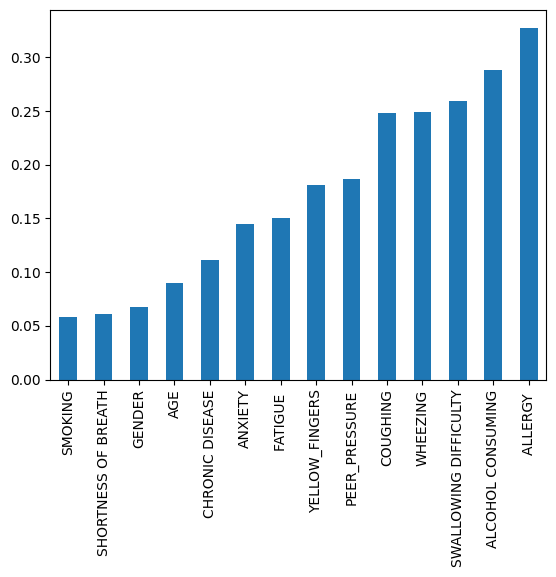

In [ ]:
#Find correlation between the variables and the target variable (Diabetes_binary
df.corr()['LUNG_CANCER'][:-2].sort_values().plot(kind='bar')

In [ ]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

GENDER 
 1    162
0    147
Name: GENDER, dtype: int64
------------------------------------------------------------------------------------------
AGE 
 64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64
------------------------------------------------------------------------------------------
SMOKING 
 2    174
1    135
Name: SMOKING, dtype: int64
------------------------------------------------------------------------------------------
YELLOW_FINGERS 
 2    176
1    133
Name: YELLOW_FINGERS, dtype: int64
------------------------------------------------------------------------------------------
ANXIETY 
 1    155
2    154
Name: ANXIETY, dtype: int64
-------------------

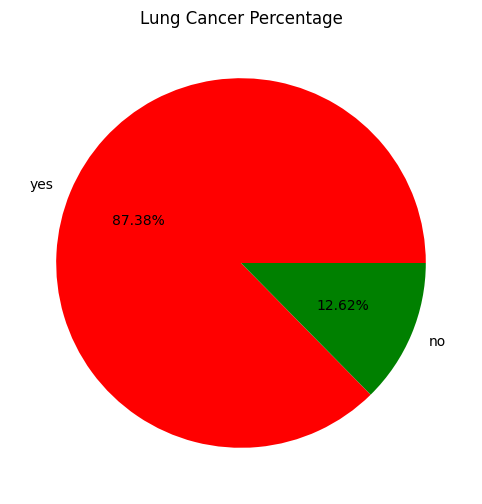

In [ ]:
#Plot pie chart to show Lung Cancer Percentage
plt.figure(figsize=(10,6))
plt.pie(df['LUNG_CANCER']. value_counts(),labels=['yes','no'],autopct='%1.2f%%', colors=['red','green'])
plt.title('Lung Cancer Percentage')
plt.show()

Highly imbalanced data

In [ ]:
# Split cancer
cancer = df.where(df.LUNG_CANCER == 1)

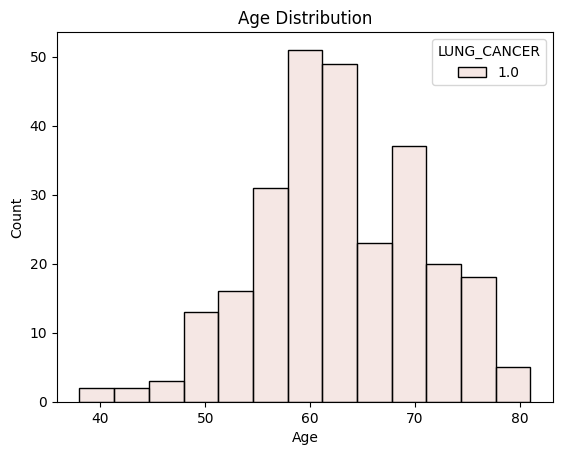

In [ ]:
# Age group distribution
sns.histplot(x='AGE', data=cancer, hue='LUNG_CANCER')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

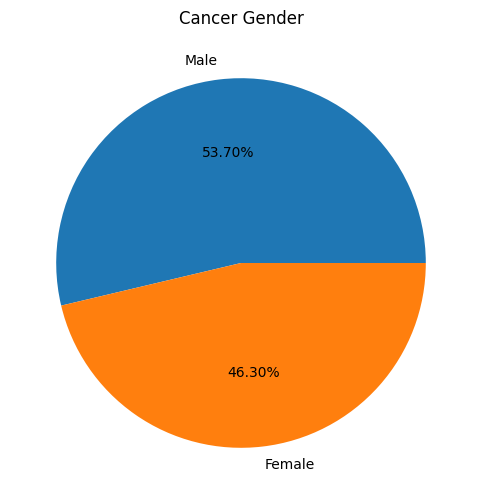

In [ ]:
# Plot pie chart to show sex distribution of Diabetes pations
plt.figure(figsize=(10,6))
plt.pie(cancer['GENDER'].value_counts(), labels=['Male','Female'] , autopct='%1.2f%%')
plt.title('Cancer Gender')
plt.show()

Text(0.5, 1.0, 'smoker and non smokier in terms of Cancer patient')

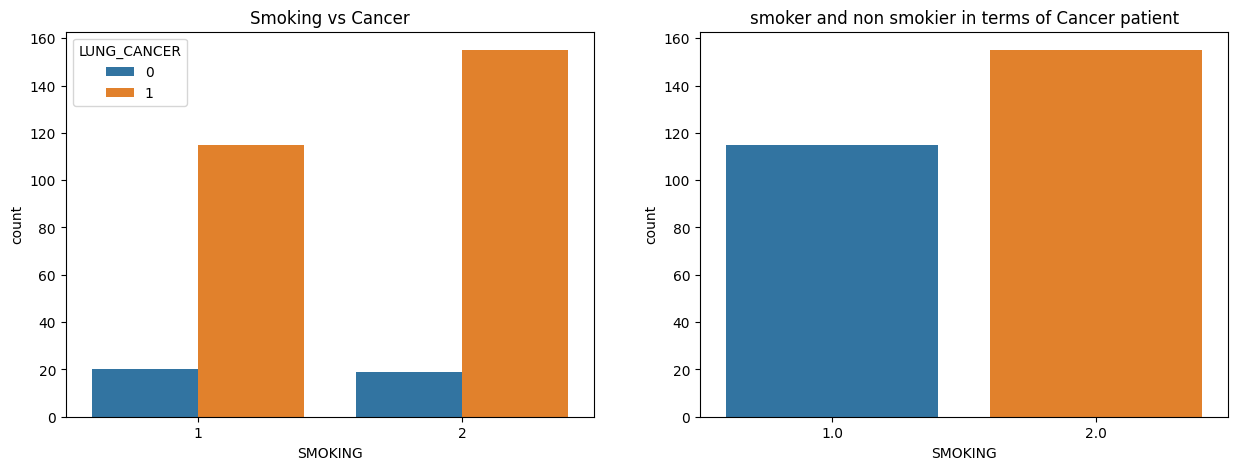

In [ ]:
# HighChol and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='SMOKING', data=df, hue='LUNG_CANCER', ax=ax[0]).set_title('Smoking vs Cancer')
sns.countplot(x='SMOKING', data=cancer, ax=ax[1]).set_title('smoker and non smokier in terms of Cancer patient')

Text(0.5, 1.0, 'Impact of Chronic diseaseE in Lung Cancer')

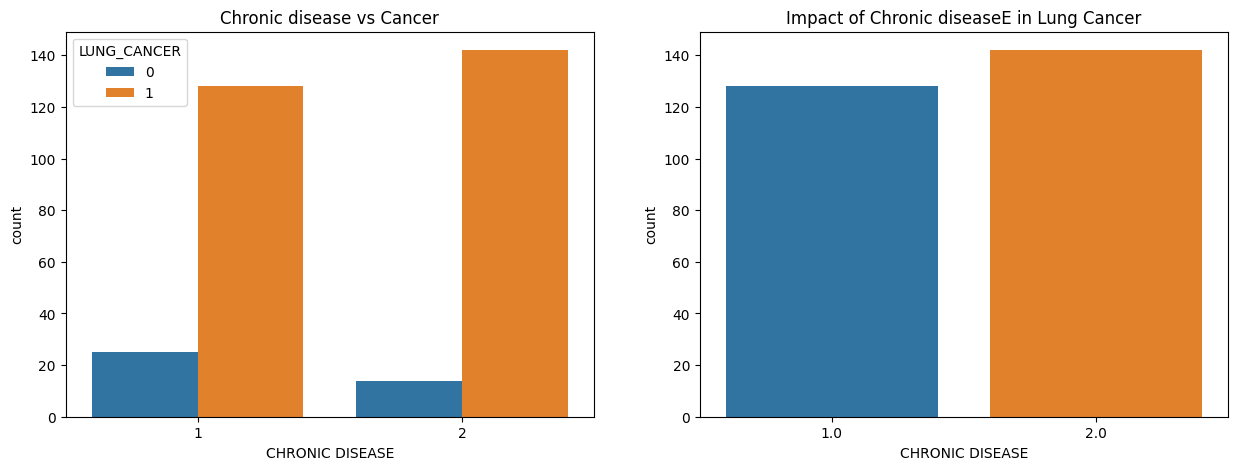

In [ ]:

# DiffWalk and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='CHRONIC DISEASE', data=df, hue='LUNG_CANCER', ax=ax[0]).set_title('Chronic disease vs Cancer')
sns.countplot(x='CHRONIC DISEASE', data=cancer, ax=ax[1]).set_title('Impact of Chronic diseaseE in Lung Cancer')

Text(0.5, 1.0, 'Smoking vs Cancer')

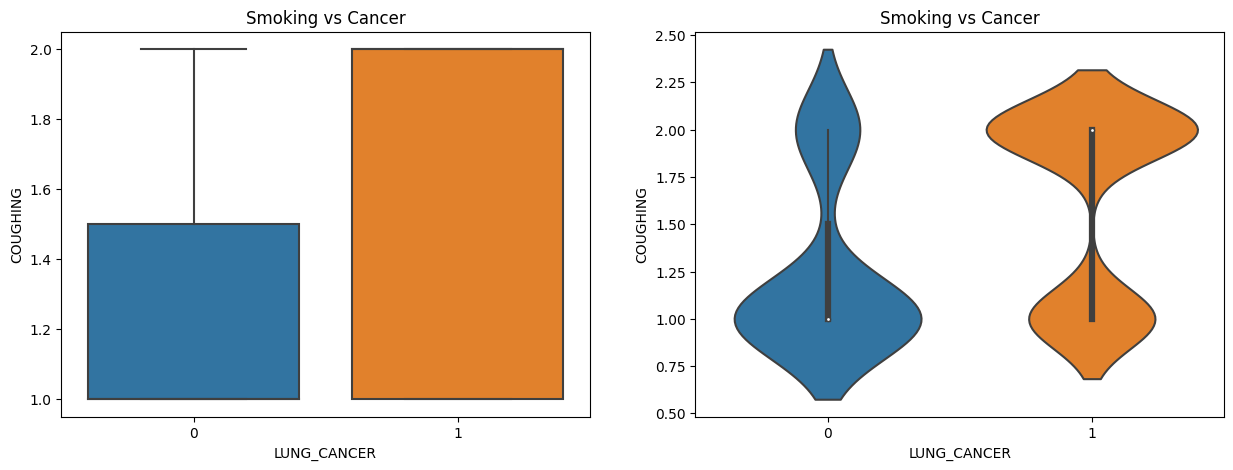

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='LUNG_CANCER', y='COUGHING', data=df, ax=ax[0]).set_title('Smoking vs Cancer')
sns.violinplot(x='LUNG_CANCER', y='COUGHING', data=df, ax=ax[1]).set_title('Smoking vs Cancer')

In [ ]:
Y1 = df.LUNG_CANCER
X1 = df.drop('LUNG_CANCER', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

# **Model 1**

In [ ]:
#simple svc
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#score for train set
svm_train_pred = clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)

#score for test set
svm_test_pred = clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)

print('svm = train accuracy = %.4f'% svm_a_train)
print('svm = test accuracy = %.4f'% svm_a_test)



svm = train accuracy = 0.9271
svm = test accuracy = 0.9677


In [ ]:
# confusion matrix for train set
svm_c_train = confusion_matrix(y_train, svm_train_pred)

#confusion matrix for tests et
svm_c_test = confusion_matrix(y_test, svm_test_pred)

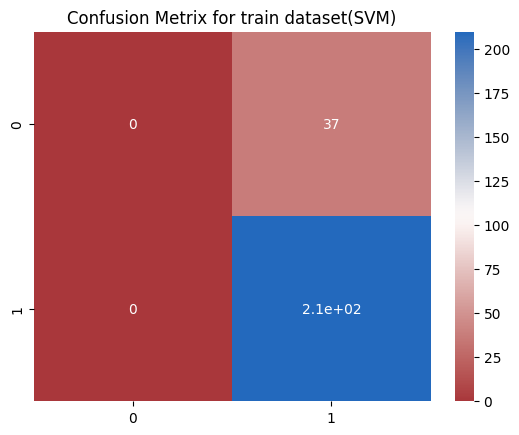

In [ ]:
sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

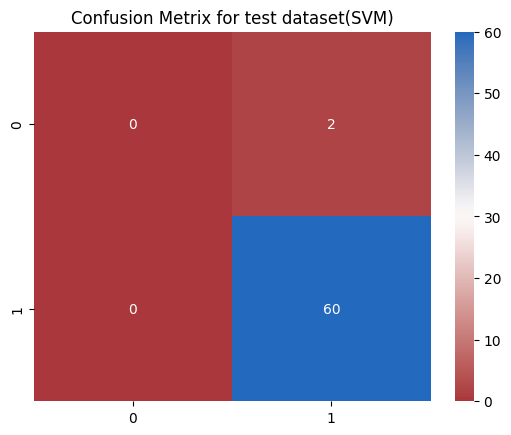

In [ ]:

sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:

svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model 2**

In [ ]:
#tuned model
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.SVC()

grid = [
        {'C' : np.logspace(-4, 2, 20),
         'kernel' : ['sigmoid','linear', 'rbf']
         }
        ]

clf = GridSearchCV(clf, param_grid = grid,cv = 3)
best_clf = clf.fit(X_train, y_train)

print(best_clf.best_estimator_)
print('train score: ',best_clf.score(X_train,y_train))
print('test score: ',best_clf.score(X_test,y_test))

SVC(C=1.2742749857031321, kernel='linear')
train score:  0.9271255060728745
test score:  0.967741935483871


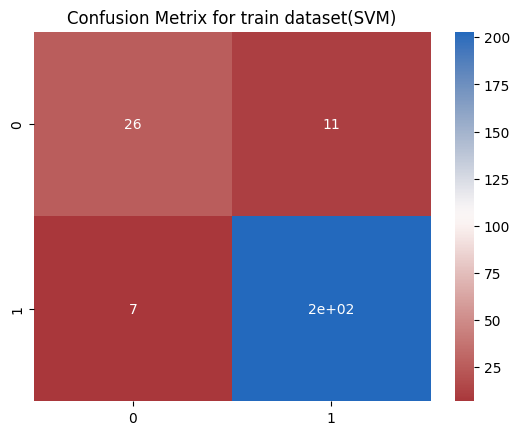

In [ ]:
#confusion matrix for train set

svm_train_pred = best_clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)
svm_c_train = confusion_matrix(y_train, svm_train_pred)

sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

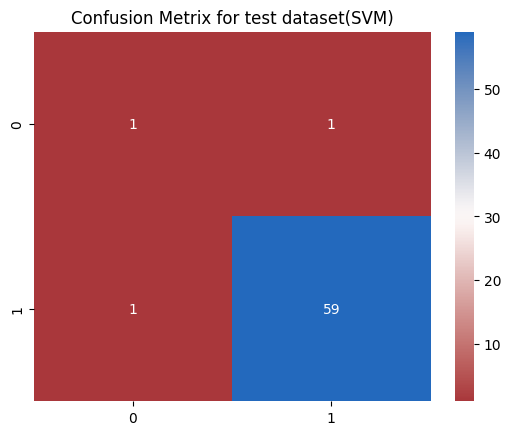

In [ ]:
#confusion  matrix for test set

svm_test_pred = best_clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)
svm_c_test = confusion_matrix(y_test, svm_test_pred)

sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

